In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

In [2]:
from methods.divide_dataframe import divide_dataframe
from models_raw.classic_models.logistic_regression.logistic_regression_fit import log_regression_fit
from models_raw.classic_models.logistic_regression.logistic_regression_predict import log_regression_predict_with_target, log_regression_predict_without_target

(CVXPY) Dec 10 06:39:25 AM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.11.4210). Expected < 9.10.0. Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Dec 10 06:39:25 AM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.11.4210). Expected < 9.10.0. Please open a feature request on cvxpy to enable support for this version.')


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
# {k:np.sum if k in {'col3','col4'} else k:np.average for k in df.columns if k not in {'col1','col2'}

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
large_credit_takers = [
    53123153,
    52175920,	
    53031443,	
    52423025,	
    51787828,
]

In [7]:
# dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')
df_bki = pd.read_csv('data/df_BKI_30k.csv', index_col=False, low_memory=False)

In [8]:
df_bki_large_credits = df_bki.loc[df_bki['application_id'].isin(large_credit_takers)]

In [9]:
df_target = pd.read_csv('data/df_target_30k.csv', index_col=False, low_memory=False)

In [10]:
final_df = divide_dataframe(df_bki, df_target)

d:\PYTHON_PROJECTS\MIPT-hackathon-Robofinance\working_with_datasets\methods\cols_to_datetime.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dates[cols_for_datetime_format] = df_dates[cols_for_datetime_format].apply(pd.to_datetime)
d:\PYTHON_PROJECTS\MIPT-hackathon-Robofinance\working_with_datasets\methods\cols_to_datetime.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dates['credit_duration'] = (df_dates['trade_close_dt'] - df_dates['trade_opened_dt']).dt.days
d:\PYTHON_PROJECTS\MIPT-hacka

In [11]:
del df_bki

In [12]:
final_df.head()

,credit_duration_mean,credit_duration_sum,credit_duration_min,credit_duration_max,negative_score_to_categorical_no_overdue,negative_score_to_categorical_mild_overdue,negative_score_to_categorical_moderate_overdue,negative_score_to_categorical_severe_overdue,account_amt_credit_limit_sum,account_amt_credit_limit_min,account_amt_credit_limit_max,account_amt_credit_limit_mean,paymnt_condition_principal_terms_amt_sum,paymnt_condition_principal_terms_amt_min,paymnt_condition_principal_terms_amt_max,paymnt_condition_principal_terms_amt_mean,paymnt_condition_interest_terms_amt_sum,paymnt_condition_interest_terms_amt_min,paymnt_condition_interest_terms_amt_max,paymnt_condition_interest_terms_amt_mean,overall_val_credit_total_amt_sum,overall_val_credit_total_amt_min,overall_val_credit_total_amt_max,overall_val_credit_total_amt_mean,overall_val_credit_total_monetary_amt_sum,overall_val_credit_total_monetary_amt_min,overall_val_credit_total_monetary_amt_max,overall_val_credit_total_monetary_amt_mean,month_aver_paymt_aver_paymt_amt_sum,month_aver_paymt_aver_paymt_amt_min,month_aver_paymt_aver_paymt_amt_max,month_aver_paymt_aver_paymt_amt_mean,arrear_start_amt_outstanding_sum,arrear_start_amt_outstanding_min,arrear_start_amt_outstanding_max,arrear_start_amt_outstanding_mean,arrear_amt_outstanding_sum,arrear_amt_outstanding_min,arrear_amt_outstanding_max,arrear_amt_outstanding_mean,arrear_principal_outstanding_sum,arrear_principal_outstanding_min,arrear_principal_outstanding_max,arrear_principal_outstanding_mean,arrear_int_outstanding_sum,arrear_int_outstanding_min,arrear_int_outstanding_max,arrear_int_outstanding_mean,arrear_other_amt_outstanding_sum,arrear_other_amt_outstanding_min,arrear_other_amt_outstanding_max,arrear_other_amt_outstanding_mean,due_arrear_amt_outstanding_sum,due_arrear_amt_outstanding_min,due_arrear_amt_outstanding_max,due_arrear_amt_outstanding_mean,due_arrear_principal_outstanding_sum,due_arrear_principal_outstanding_min,due_arrear_principal_outstanding_max,due_arrear_principal_outstanding_mean,due_arrear_int_outstanding_sum,due_arrear_int_outstanding_min,due_arrear_int_outstanding_max,due_arrear_int_outstanding_mean,due_arrear_other_amtoutstanding_sum,due_arrear_other_amtoutstanding_min,due_arrear_other_amtoutstanding_max,due_arrear_other_amtoutstanding_mean,past_due_amt_past_due_sum,past_due_amt_past_due_min,past_due_amt_past_due_max,past_due_amt_past_due_mean,past_due_principal_amt_past_due_sum,past_due_principal_amt_past_due_min,past_due_principal_amt_past_due_max,past_due_principal_amt_past_due_mean,past_due_int_amt_past_due_sum,past_due_int_amt_past_due_min,past_due_int_amt_past_due_max,past_due_int_amt_past_due_mean,past_due_other_amt_past_due_sum,past_due_other_amt_past_due_min,past_due_other_amt_past_due_max,past_due_other_amt_past_due_mean,delay5_sum,delay5_min,delay5_max,delay5_mean,delay30_sum,delay30_min,delay30_max,delay30_mean,delay60_sum,delay60_min,delay60_max,delay60_mean,delay90_sum,delay90_min,delay90_max,delay90_mean,delay_more_sum,delay_more_min,delay_more_max,delay_more_mean,cred_max_overdue_sum,cred_max_overdue_min,cred_max_overdue_max,cred_max_overdue_mean,trade_owner_indic_1.0,trade_owner_indic_2.0,trade_owner_indic_4.0,trade_owner_indic_99.0,trade_trade_type_code_1.0,trade_trade_type_code_2.0,trade_trade_type_code_4.0,trade_trade_type_code_5.0,trade_loan_kind_code_1.0,trade_loan_kind_code_2.0,trade_loan_kind_code_3.0,trade_loan_kind_code_4.0,trade_loan_kind_code_5.0,trade_loan_kind_code_6.0,trade_loan_kind_code_7.0,trade_loan_kind_code_99.0,trade_has_card_0.0,trade_has_card_1.0,trade_is_novation_0.0,trade_is_novation_1.0,trade_is_money_source_0.0,trade_is_money_source_1.0,coborrower_has_solidary_0.0,coborrower_has_solidary_1.0,coborrower_solidary_num_1.0,coborrower_solidary_num_2.0,coborrower_solidary_num_3.0,coborrower_solidary_num_4.0,coborrower_solidary_num_5.0,paymnt_condition_terms_frequency_1.0,paymnt_condition_terms_frequency_2.0,paymnt_condition_terms_frequency_3.0,paymnt_condition_t

In [13]:
logerg_pickle_file_path = 'models_saved/classic_models/logistic_regression/'

In [14]:
cols_to_drop = log_regression_fit(final_df, logerg_pickle_file_path)

In [16]:
logreg_predict = log_regression_predict_with_target(final_df, cols_to_drop, logerg_pickle_file_path)

LogRegression test score: 0.783
              precision    recall  f1-score   support

           0       0.79      0.99      0.88      7069
           1       0.44      0.04      0.07      1931

    accuracy                           0.78      9000
   macro avg       0.61      0.51      0.47      9000
weighted avg       0.71      0.78      0.70      9000



In [33]:
optb = binning_process.get_binned_variable("negative_score_to_categorical_no_overdue")

In [34]:
optb.binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",3488,0.166095,2461,1027,0.294438,-0.435569,0.035384,0.004388
1,"[0.50, 1.50)",2406,0.114571,1810,596,0.247714,-0.198653,0.004778,0.000596
2,"[1.50, 2.50)",1792,0.085333,1380,412,0.229911,-0.100679,0.000890,0.000111
3,"[2.50, 6.50)",4626,0.220286,3673,953,0.206010,0.039655,0.000342,0.000043
4,"[6.50, inf)",8688,0.413714,7212,1476,0.169890,0.276916,0.029213,0.003640
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,21000,1.000000,16536,4464,0.212571,,0.070608,0.008779


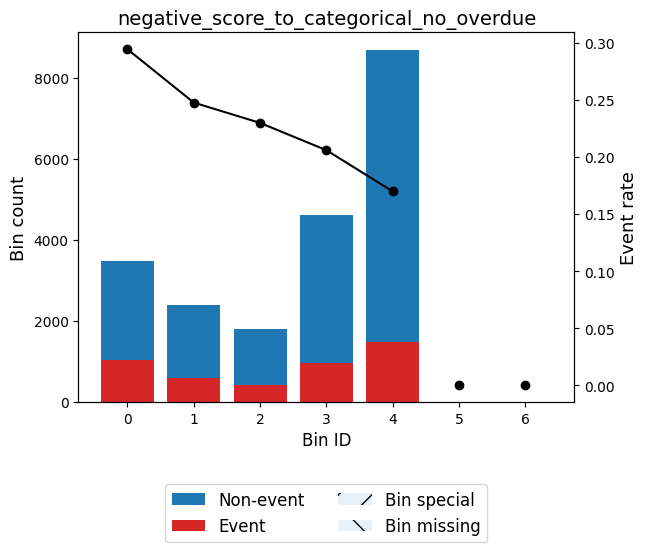

In [35]:
optb.binning_table.plot(metric="event_rate")

In [15]:
log_regression_fit(X_train, y_train, 'models_saved/classic_models/logistic_regression/')

LogRegression train score: 0.786


d:\PYTHON_PROJECTS\MIPT-hackathon-Robofinance\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
log_reg_pred = log_regression_predict_with_target(X_test, y_test, 'models_saved/classic_models/logistic_regression/')

LogRegression test score: 0.7843333333333333


In [ ]:
# df_bki['application_id'].value_counts()

In [ ]:
df_test = pd.get_dummies(df_bki.loc[(df_bki['application_id'] == 53123153) | (df_bki['application_id'] == 52175920)][['application_id', 'trade_acct_type1', 'trade_loan_kind_code']], columns=['trade_acct_type1', 'trade_loan_kind_code'], dtype=int)

In [ ]:
# df_test

In [ ]:
df_test.groupby(['application_id']).sum()

,trade_acct_type1_1.0,trade_acct_type1_4.7,trade_acct_type1_8.0,trade_acct_type1_9.0,trade_acct_type1_14.0,trade_acct_type1_15.0,trade_acct_type1_19.0,trade_acct_type1_99.0,trade_loan_kind_code_1.0,trade_loan_kind_code_2.0,trade_loan_kind_code_3.0,trade_loan_kind_code_4.0,trade_loan_kind_code_5.0,trade_loan_kind_code_7.0,trade_loan_kind_code_99.0
application_id,,,,,,,,,,,,,,,
52175920,2,1,6,1,1,2,311,59,3,1,366,2,7,3,1
53123153,1,0,0,0,1,2,476,12,2,0,485,0,5,0,0


In [ ]:
# df_bki['trade_opened_dt'].value_counts().sort_index(ascending=True)

In [ ]:
# df_bki[(df_bki['application_id'] == 53123153)]['trade_opened_dt'].value_counts().sort_index(ascending=True)

In [ ]:
# df_bki[(df_bki['application_id'] == 53123153)]['trade_close_dt'].value_counts().sort_index(ascending=True)

In [ ]:
df_bki[(df_bki['application_id'] == 53123153)][['trade_opened_dt', 'trade_close_dt']].sort_values('trade_opened_dt').head()

,trade_opened_dt,trade_close_dt
282915,2013-04-11,2018-08-08
246354,2013-12-25,2018-08-06
257865,2014-05-06,2018-05-06
253527,2014-07-04,NaN
253487,2018-05-15,2018-06-04


In [ ]:
df_test1 = pd.pivot_table(df_bki[['application_id', 'account_amt_credit_limit', 'trade_loan_kind_code']], values=['account_amt_credit_limit'], index=['application_id'], columns=['trade_loan_kind_code'], aggfunc='sum')

In [ ]:
df_test1 = df_test1.fillna(0.0)

In [ ]:
df_test1.head()

account_amt_credit_limit                           \
trade_loan_kind_code                     1.0  2.0        3.0      4.0    
application_id                                                           
51534101                            387063.66  0.0  110394.95      0.0   
51534210                              5300.00  0.0   88329.00      0.0   
51534377                                 0.00  0.0   17000.00      0.0   
51534467                            119726.58  0.0       0.00  15000.0   
51534573                            497962.00  0.0  211845.38  16856.0   

                                                    
trade_loan_kind_code      5.0  6.0       7.0  99.0  
application_id                                      
51534101                   0.0  0.0       0.0  0.0  
51534210                   0.0  0.0       0.0  0.0  
51534377               56000.0  0.0       0.0  0.0  
51534467               15000.0  0.0       0.0  0.0  
51534573              188000.0  0.0  190000.0  0.0

In [ ]:
df_test1.loc[53123153]

                          trade_loan_kind_code
account_amt_credit_limit  1.0                      799000.00
                          2.0                           0.00
                          3.0                     7899652.09
                          4.0                           0.00
                          5.0                      270000.10
                          6.0                           0.00
                          7.0                           0.00
                          99.0                          0.00
Name: 53123153, dtype: float64

In [ ]:
df_test2 = pd.pivot_table(df_bki[['application_id', 'account_amt_credit_limit', 'trade_loan_kind_code']], values=['account_amt_credit_limit'], index=['application_id'], columns=['trade_loan_kind_code'], aggfunc='mean')

In [ ]:
df_test2 = df_test2.fillna(0.0)

In [ ]:
df_test2.head()

account_amt_credit_limit                              \
trade_loan_kind_code                     1.0  2.0           3.0      4.0    
application_id                                                              
51534101                        129021.220000  0.0   7885.353571      0.0   
51534210                          5300.000000  0.0   5520.562500      0.0   
51534377                             0.000000  0.0   5666.666667      0.0   
51534467                         59863.290000  0.0      0.000000  15000.0   
51534573                         45269.272727  0.0  30263.625714  16856.0   

                                                       
trade_loan_kind_code     5.0  6.0           7.0  99.0  
application_id                                         
51534101                  0.0  0.0      0.000000  0.0  
51534210                  0.0  0.0      0.000000  0.0  
51534377              28000.0  0.0      0.000000  0.0  
51534467              15000.0  0.0      0.000000  0.0  
51534573              37600.0  0.0  63333.333333  0.0